In [1]:
%cd ..

/home/eli/AnacondaProjects/categorical_bpl


In [2]:
import argparse
import collections
import pyro
import torch
import numpy as np
import data_loader.data_loaders as module_data
import model.model as module_arch
from parse_config import ConfigParser
from trainer import Trainer

In [3]:
%matplotlib inline

In [4]:
pyro.enable_validation(False)
torch.autograd.set_detect_anomaly(False)

In [5]:
# fix random seeds for reproducibility
SEED = 123
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(SEED)

In [6]:
Args = collections.namedtuple('Args', 'config resume device')
config = ConfigParser.from_args(Args(config='omniglot_config.json', resume=None, device=None))

In [7]:
logger = config.get_logger('train')

In [8]:
# setup data_loader instances
data_loader = config.init_obj('data_loader', module_data)
valid_data_loader = data_loader.split_validation()

Files already downloaded and verified
Files already downloaded and verified


In [9]:
# build model architecture, then print to console
model = config.init_obj('arch', module_arch)

In [10]:
optimizer = pyro.optim.ReduceLROnPlateau({
    'optimizer': torch.optim.Adam,
    'optim_args': {
        "lr": 1e-3,
        "weight_decay": 0,
        "amsgrad": True
    },
    "patience": 100,
    "cooldown": 50,
    "factor": 0.1,
    "verbose": True,
})

In [11]:
trainer = Trainer(model, [], optimizer, config=config,
                  data_loader=data_loader,
                  valid_data_loader=valid_data_loader)

In [12]:
trainer.train()

Train Epoch: 1 [512/17352 (3%)] Loss: 1666.439941
Train Epoch: 1 [9592/17352 (55%)] Loss: 991.075758
Train Epoch: 1 [16939/17352 (98%)] Loss: 1001.800239
    epoch          : 1
    loss           : 1102.940570486198
    val_loss       : 965.5603284792563
    val_log_likelihood: -814.1263543125505
    val_log_marginal: -898.3114033969625
Train Epoch: 2 [512/17352 (3%)] Loss: 953.198853
Train Epoch: 2 [9476/17352 (55%)] Loss: 896.122931
Train Epoch: 2 [16883/17352 (97%)] Loss: 814.161296
    epoch          : 2
    loss           : 919.2184273375649
    val_loss       : 843.0521419594236
    val_log_likelihood: -756.5818916765144
    val_log_marginal: -803.4424633770708
Train Epoch: 3 [512/17352 (3%)] Loss: 934.277832
Train Epoch: 3 [10373/17352 (60%)] Loss: 874.283727
Train Epoch: 3 [16883/17352 (97%)] Loss: 762.236285
    epoch          : 3
    loss           : 915.2603219524135
    val_loss       : 802.2210397575307
    val_log_likelihood: -728.5109035296216
    val_log_marginal: -780.

In [13]:
model.cpu()

GlimpseOperadicModel(
  (_operad): FreeOperad(
    (generator_0): DensityDecoder(
      (distribution): DiagonalGaussian()
      (neural_layers): Sequential(
        (0): Linear(in_features=4, out_features=6, bias=True)
        (1): LayerNorm((6,), eps=1e-05, elementwise_affine=True)
        (2): PReLU(num_parameters=1)
        (3): Linear(in_features=6, out_features=6, bias=True)
        (4): LayerNorm((6,), eps=1e-05, elementwise_affine=True)
        (5): PReLU(num_parameters=1)
        (6): Linear(in_features=6, out_features=16, bias=True)
      )
    )
    (generator_1): DensityDecoder(
      (distribution): DiagonalGaussian()
      (neural_layers): Sequential(
        (0): Linear(in_features=4, out_features=10, bias=True)
        (1): LayerNorm((10,), eps=1e-05, elementwise_affine=True)
        (2): PReLU(num_parameters=1)
        (3): Linear(in_features=10, out_features=10, bias=True)
        (4): LayerNorm((10,), eps=1e-05, elementwise_affine=True)
        (5): PReLU(num_paramet

In [14]:
import matplotlib.pyplot as plt

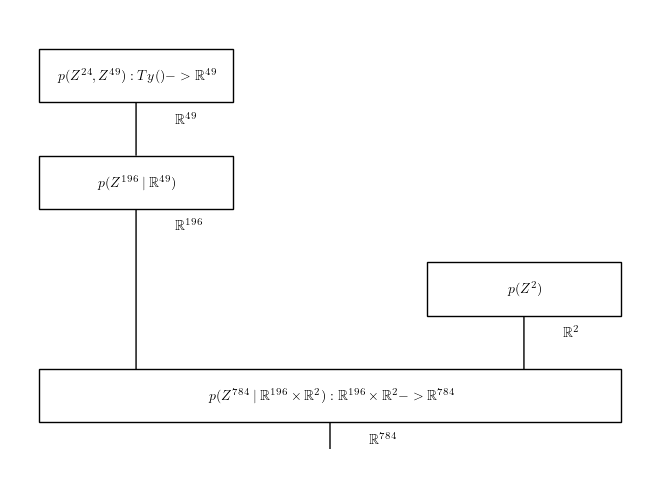

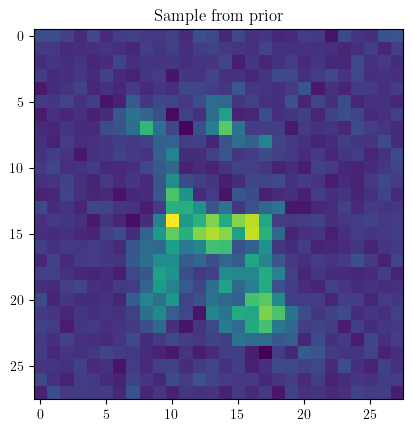

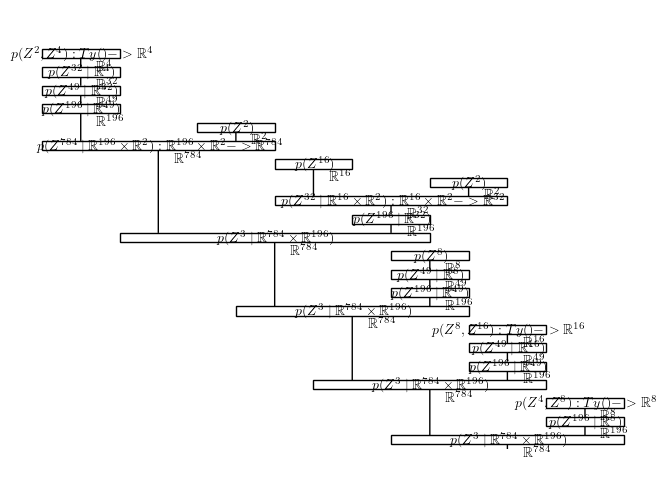

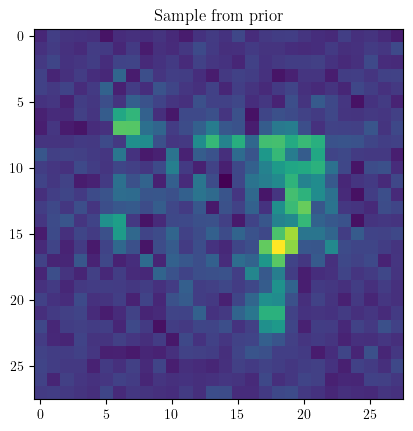

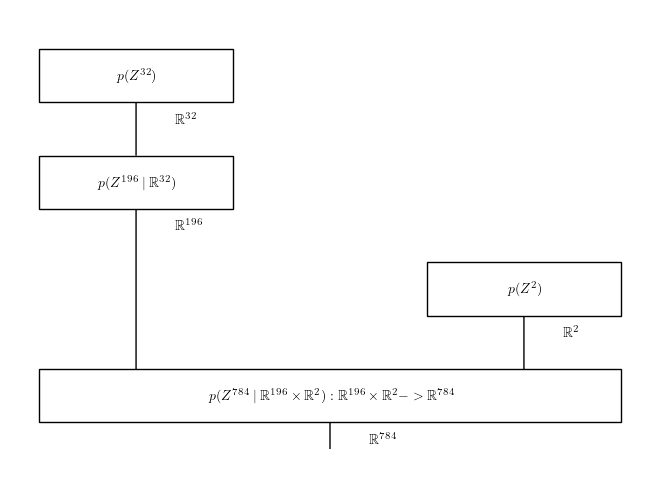

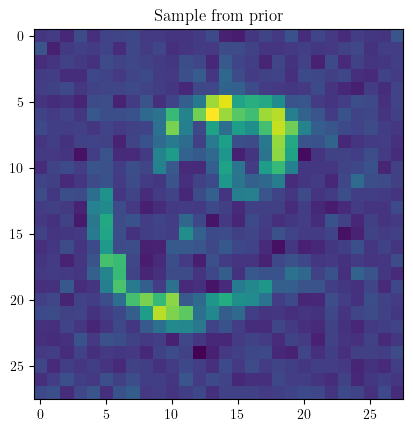

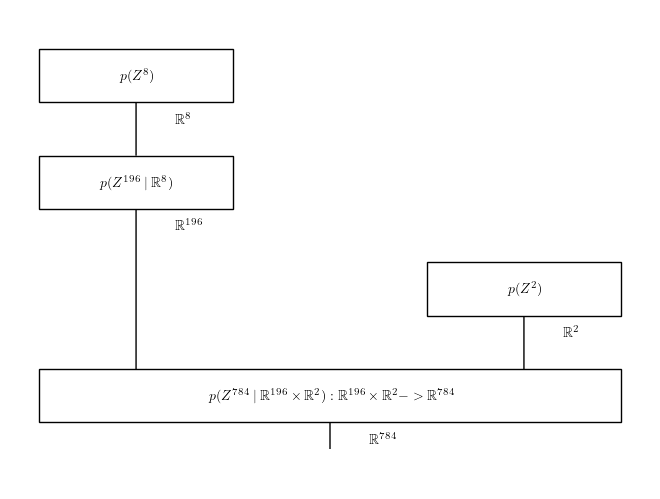

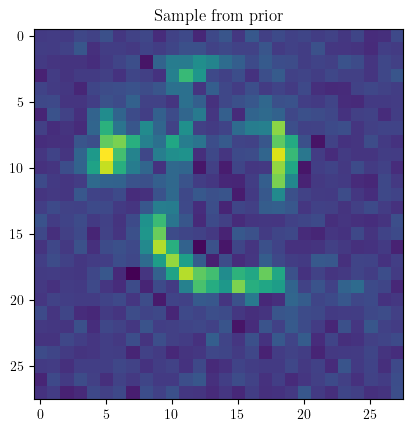

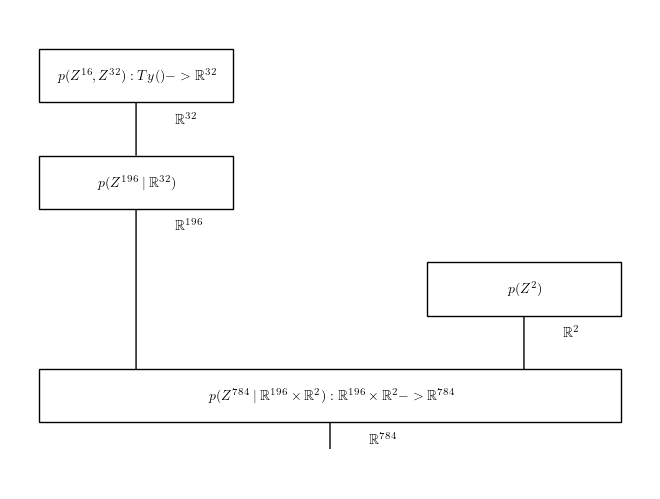

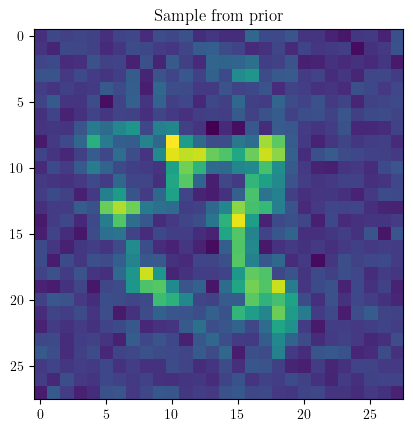

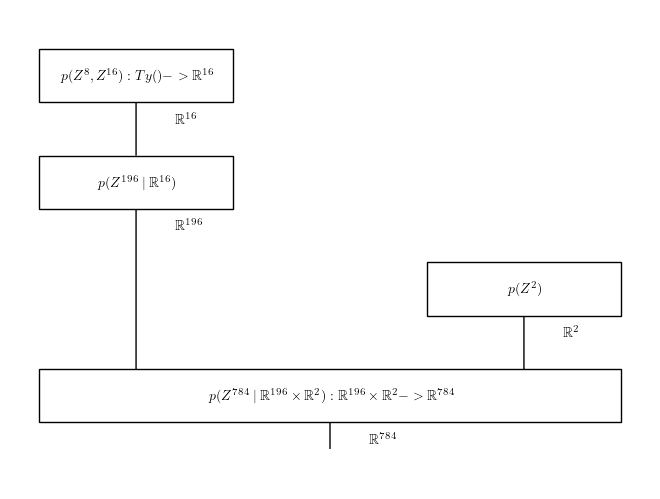

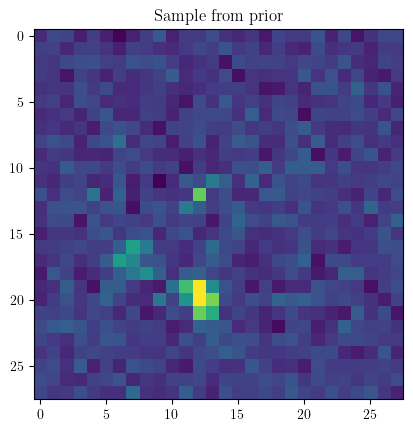

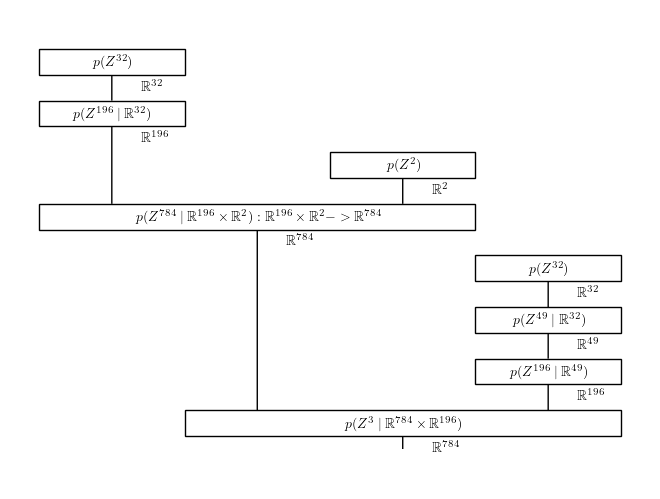

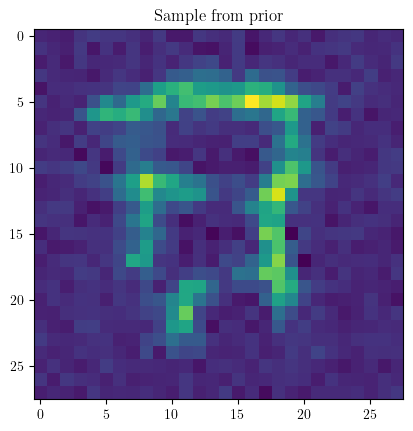

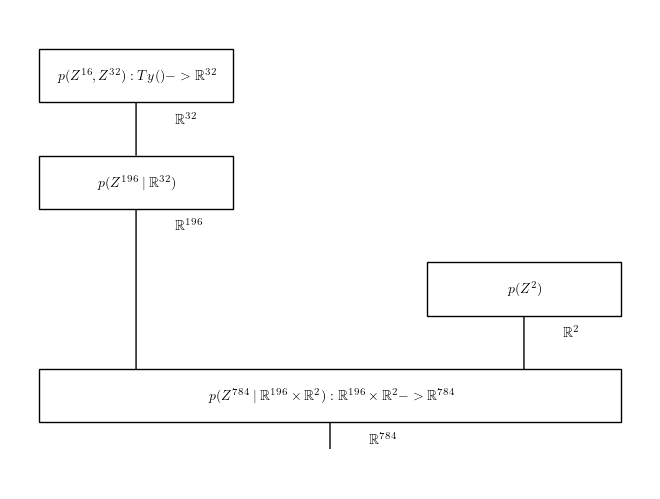

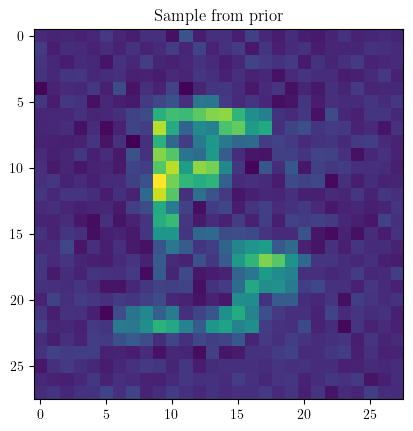

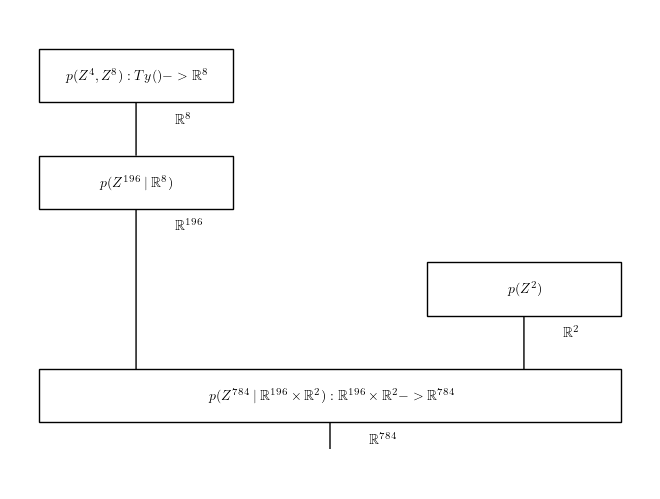

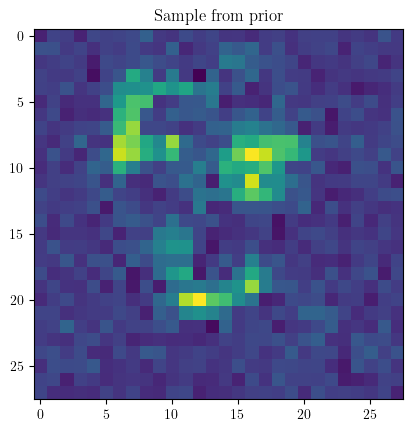

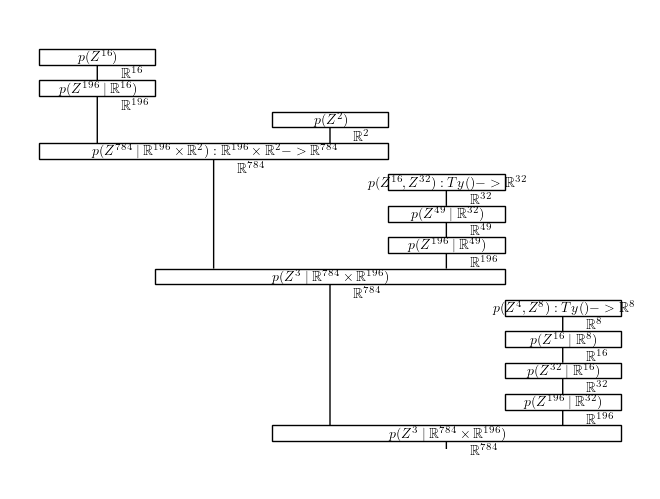

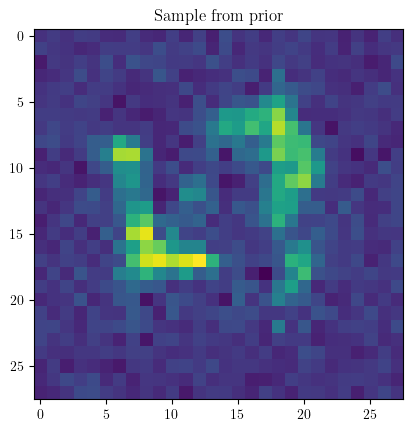

In [15]:
for k in range(10):
    path, sample = model(observations=None)
    sample = sample.view(28, 28).detach().cpu().numpy()
    path.draw()

    plt.title('Sample from prior')
    plt.imshow(sample)
    plt.show()